In [2]:
import pandas as pd 
import random as rand
from sklearn import preprocessing


In [ ]:
## Q1 A.  Download the Breast Cancer Wisconsin (Diagnostic) Data Set from:
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+
# %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/
# machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which
# has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has
# two output classes. Use the first 20% of the positive and negative classes in the
# file as the test set and the rest as the training set.


## Q1 B .1 Monte-Carlo Simulation: Repeat the following procedures for supervised, un-
## supervised, and semi-supervised learning M = 30 times, and use randomly se-
## lected train and test data (make sure you use 20% of both the positve and nega-
## tive classes as the test set). Then compare the average scores (accuracy, precision,
## recall, F-score, and AUC) that you obtain from each algorithm.
## i. Supervised Learning: Train an L 1 -penalized SVM to classify the data.
## Use 5 fold cross validation to choose the penalty parameter. Use normalized
## data. Report the average accuracy, precision, recall, F-score, and AUC, for
## both training and test sets over your M runs. Plot the ROC and report the
## confusion matrix for training and testing in one of the runs.

In [3]:
# Supervised

from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import auc
import statistics
import warnings
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score ,auc,roc_curve


warnings.filterwarnings('ignore')
precision1=[]
recall= []
fscore = []
AUC=[] 
accuracy_sc=[]


precision1_train=[]
recall_train= []
fscore_train = []
AUC_train=[] 
accuracy_sc_train=[]

for m in range(1,30):
    data= pd.read_csv('wdbc.data',header=None)

    data.columns=['IDs','Diagnosis','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']

    data_x = data.drop(['IDs','Diagnosis'],axis=1)
    data_x_nomalize = pd.DataFrame(preprocessing.normalize(data_x))
    data = pd.concat([data[['Diagnosis']],data_x_nomalize],axis=1)
    data["Diagnosis"] = data["Diagnosis"].map( {'M':0, 'B':1} )

    data_malignant_filter = data['Diagnosis'] == 0

    data_malignant = data[data_malignant_filter]

    data_malignant_20_test = data_malignant.sample(frac=.20,random_state=rand.randint(0,100))

    data_benign_filter = data['Diagnosis'] == 1
    data_benign = data[data_benign_filter]
    data_benign_20_test= data_benign.sample(frac=.20,random_state=rand.randint(1,100))

    test_data = pd.concat([data_malignant_20_test,data_benign_20_test]) 
    index1 = test_data.index
    train_data = data.drop(index= index1)
    test_x = test_data.drop(['Diagnosis'],axis=1)
    test_y = test_data['Diagnosis']
    train_x = train_data.drop(['Diagnosis'],axis=1)
    train_y=train_data['Diagnosis']

    #test 
    parameters = [{'C': [1, 10, 100,1000]}]   
    clf = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv=5)
    clf.fit(train_x, train_y)
    pred_y = clf.predict(test_x)
    
    #report1 = classification_report(test_y, y_pred,output_dict=True)
    #report = classification_report(test_y, pred_y)
    precision1.append(precision_score(test_y, pred_y))
    recall.append(recall_score(test_y, pred_y))
    accuracy_sc.append(accuracy_score(test_y, pred_y)) 
    fscore.append(f1_score(test_y, pred_y))
    fpr, tpr, _ = roc_curve(test_y,pred_y)
    AUC.append(auc(fpr, tpr))
    
    #train
    parameters = [{'C': [1, 10, 100,1000]}]   
    clf = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv=5)
    clf.fit(train_x, train_y)
    pred_y_train = clf.predict(train_x)
     
    #report1 = classification_report(test_y, y_pred,output_dict=True)
    #report = classification_report(test_y, pred_y)
    precision1_train.append(precision_score(train_y, pred_y_train))
    recall_train.append(recall_score(train_y, pred_y_train))
    accuracy_sc_train.append(accuracy_score(train_y, pred_y_train)) 
    fscore_train.append(f1_score(train_y,pred_y_train))
    fpr_train, tpr_train, _ = roc_curve(train_y,pred_y_train)
    AUC_train.append(auc(fpr_train, tpr_train))
    
   

avg_precision = statistics.mean(precision1)
avg_f1score = statistics.mean(fscore)
avg_recall = statistics.mean(recall)
avg_accuracy_Score= statistics.mean(accuracy_sc)
print("Avg_Precision{}\nAvg_F1-score{}\nAvg_recall{}\nAvg_accuracy_score{}".format(avg_precision,avg_f1score,avg_recall,avg_accuracy_Score))

print("\n Train")
avg_precision_train = statistics.mean(precision1_train)
avg_f1score_train = statistics.mean(fscore_train)
avg_recall_train = statistics.mean(recall_train)
avg_accuracy_Score_train= statistics.mean(accuracy_sc_train)
print("Avg_Precision{}\nAvg_F1-score{}\nAvg_recall{}\nAvg_accuracy_score{}".format(avg_precision_train,avg_f1score_train,avg_recall_train,avg_accuracy_Score_train))

Avg_Precision0.9605846557488371
Avg_F1-score0.9604873110773907
Avg_recall0.9606605148130161
Avg_accuracy_score0.950259383582545

 Train
Avg_Precision0.9734683682528049
Avg_F1-score0.97532856957225
Avg_recall0.9772124427296841
Avg_accuracy_score0.9689957652752571


Test Area under the curve


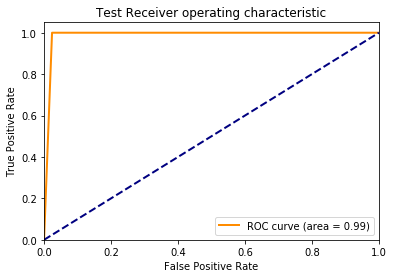

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

print("Test Area under the curve")
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


Train Area under the curve


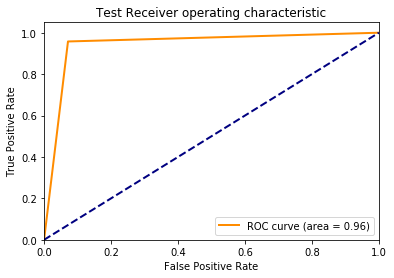

In [81]:
#train area under the curve

print("Train Area under the curve")
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_train, tpr_train))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [76]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(test_y,pred_y)
print("Confusion Matrix Test: ")
print(conf)

conf_tr = confusion_matrix(train_y,pred_y_train)
print("Confusion Matrix Test: ")
print(conf_tr)

Confusion Matrix for the test set: 
[[40  2]
 [ 1 70]]
Confusion Matrix for the train set: 
[[162   8]
 [  9 277]]


In [ ]:
## Q1 B 2 Semi-Supervised Learning/ Self-training: select 50% of the positive
## class along with 50% of the negative class in the training set as labeled data
## and the rest as unlabelled data. You can select them randomly.
## A. Train an L 1 -penalized SVM to classify the labeled data Use normalized
## data. Choose the penalty parameter using 5 fold cross validation.
## B. Find the unlabeled data point that is the farthest to the decision boundary
## of the SVM. Let the SVM label it (ignore its true label), and add it to
## the labeled data, and retrain the SVM. Continue this process until all
## unlabeled data are used. Test the final SVM on the test data andthe
## average accuracy, precision, recall, F-score, and AUC, for both training
## and test sets over your M runs. Plot the ROC and report the confusion
## matrix for training and testing in one of the runs.

In [ ]:
#semi supervised

In [3]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import auc
import statistics
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score ,auc,roc_curve
import numpy as np 

ps=[]
rs=[]
acs=[]
fs=[]
AUC=[]

ps_tr=[]
rs_tr=[]
acs_tr=[]
fs_tr=[]
AUC_tr=[]


for m in range(0,30):
    data= pd.read_csv('wdbc.data',header=None)
    data.columns=['IDs','Diagnosis','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']
    data_x = data.drop(['IDs','Diagnosis'],axis=1)
    data_x_nomalize = pd.DataFrame(preprocessing.normalize(data_x))
    data = pd.concat([data[['Diagnosis']],data_x_nomalize],axis=1)
    data["Diagnosis"] = data["Diagnosis"].map( {'M':0, 'B':1} )
    data_malignant_filter = data['Diagnosis'] == 0
    data_malignant = data[data_malignant_filter]
    data_malignant_20_test = data_malignant.sample(frac=.50,random_state=rand.randint(0,100))
    data_benign_filter = data['Diagnosis'] == 1
    data_benign = data[data_benign_filter]
    data_benign_20_test= data_benign.sample(frac=.50,random_state=rand.randint(1,100))
    test_data = pd.concat([data_malignant_20_test,data_benign_20_test]) 
    index1 = test_data.index
    train_data = data.drop(index= index1)
    label_data = train_data
    unlabeled_data = test_data.drop('Diagnosis',axis=1)
    unlabeled_data_y = test_data['Diagnosis']
    unlabeled_data_final =unlabeled_data.reset_index(drop=True)
    unlabeled_data = unlabeled_data_final
    labeled_x = train_data.drop(['Diagnosis'],axis=1)
    labeled_x = labeled_x.reset_index(drop=True)
    labeled_y=train_data['Diagnosis']
    labeled_y=labeled_y.reset_index(drop=True)
    
    
    print(m)
    labeled_x_final = train_data.drop(['Diagnosis'],axis=1)
    labeled_x_final = labeled_x_final.reset_index(drop=True)
    labeled_y_final=train_data['Diagnosis']
    labeled_y_final=labeled_y_final.reset_index(drop=True)
    

    
    for un in range(len(unlabeled_data)):
        parameters = [{'C': [0.1,0.001,1, 10, 100, 1000],'max_iter':[2000]}]
        clf = GridSearchCV(LinearSVC(penalty='l1',dual=False),parameters,cv=5)
        clf.fit(labeled_x,labeled_y)
        #l = np.argmax(clf.decision_function(unlabeled_data))
        l = int(np.argmax(clf.decision_function(unlabeled_data)))
        max_dist_val = pd.Series.to_frame(unlabeled_data.iloc[l,:]).T
        pred_app = pd.DataFrame(clf.predict(max_dist_val))
        labeled_y = pd.concat([labeled_y,pred_app],axis=0)
        labeled_x = pd.concat([labeled_x,max_dist_val],axis=0)
        unlabeled_data = unlabeled_data.drop(index=l,axis=0)
        unlabeled_data = unlabeled_data.reset_index(drop=True)
    
    #test
    pred_final = clf.predict(unlabeled_data_final)
    ps.append(precision_score(unlabeled_data_y, pred_final))
    rs.append(recall_score(unlabeled_data_y,pred_final))
    acs.append(accuracy_score(unlabeled_data_y, pred_final)) 
    fs.append(f1_score(unlabeled_data_y, pred_final))
    fpr, tpr, _ = roc_curve(unlabeled_data_y,pred_final)
    AUC.append(auc(fpr, tpr))
    
    
    #train
    
    pred_final_train=clf.predict(labeled_x_final) #train
    #pred_y_tr = model.predict(x_lab)
    ps_tr.append(precision_score(labeled_y_final, pred_final_train))
    rs_tr.append(recall_score(labeled_y_final,pred_final_train))
    acs_tr.append(accuracy_score(labeled_y_final, pred_final_train)) 
    fs_tr.append(f1_score(labeled_y_final, pred_final_train))
    fpr_tr, tpr_tr, _ = roc_curve(labeled_y_final,pred_final_train)
    AUC_tr.append(auc(fpr_tr, tpr_tr))

    

print("Train Values")
print("avg  precision score: ",statistics.mean(ps_tr))
print("avg  f1 score: ",statistics.mean(fs_tr))
print("avg  recall score: ",statistics.mean(rs_tr))
print("avg AUC score: ",statistics.mean(AUC_tr))
print("avg acuracy score: ",statistics.mean(acs_tr))
print("TEST values")
print("avg precision score: ",statistics.mean(ps))
print("avg f1 score: ",statistics.mean(fs))
print("avg recall score: ",statistics.mean(rs))
print("avg AUC score: ",statistics.mean(AUC))
print("avg acuracy score: ",statistics.mean(acs))
    
        


    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Train Values
avg  precision score:  0.9633090567916686
avg  f1 score:  0.9720966716503162
avg  recall score:  0.9811918063314711
avg AUC score:  0.9588348968764273
avg acuracy score:  0.964561403508772
TEST values
avg precision score:  0.939620446213728
avg f1 score:  0.9580053289706174
avg recall score:  0.9775280898876404
avg AUC score:  0.9354621581513675
avg acuracy score:  0.9461267605633803


In [4]:
print("Train Values")
print("avg  precision score: ",statistics.mean(ps_tr))
print("avg  f1 score: ",statistics.mean(fs_tr))
print("avg  recall score: ",statistics.mean(rs_tr))
print("avg AUC score: ",statistics.mean(AUC_tr))
print("avg acuracy score: ",statistics.mean(acs_tr))
print("TEST values")
print("avg precision score: ",statistics.mean(ps))
print("avg f1 score: ",statistics.mean(fs))
print("avg recall score: ",statistics.mean(rs))
print("avg AUC score: ",statistics.mean(AUC))
print("avg acuracy score: ",statistics.mean(acs))

Train Values
avg  precision score:  0.9633090567916686
avg  f1 score:  0.9720966716503162
avg  recall score:  0.9811918063314711
avg AUC score:  0.9588348968764273
avg acuracy score:  0.964561403508772
TEST values
avg precision score:  0.939620446213728
avg f1 score:  0.9580053289706174
avg recall score:  0.9775280898876404
avg AUC score:  0.9354621581513675
avg acuracy score:  0.9461267605633803


Test Area under the curve


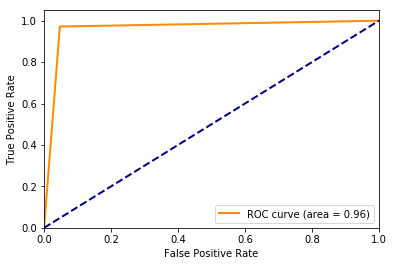

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Test Area under the curve")
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.show()

Train Area under the curve


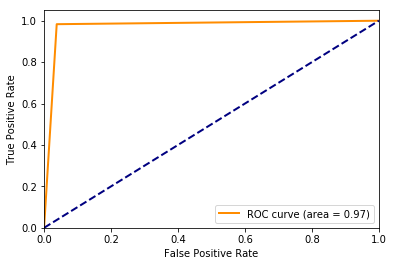

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Train Area under the curve")
plt.figure()
lw=2
plt.plot(fpr_tr, tpr_tr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_tr, tpr_tr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.show()


In [11]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(unlabeled_data_y, pred_final)
print("Confusion Matrix test: ")
print(conf)

conf_tr = confusion_matrix(labeled_y_final, pred_final_train)
print("Confusion Matrix train: ")
print(conf_tr)

Confusion Matrix test: 
[[ 90  16]
 [  6 172]]
Confusion Matrix train: 
[[ 99   7]
 [  3 176]]


In [ ]:
## Q1 3 Unsupervised Learning: Run k-means algorithm on the whole training
## set. Ignore the labels of the data, and assume k = 2.
## A. Run the k-means algorithm multiple times. Make sure that you initialize
## the algoritm randomly. How do you make sure that the algorithm was
## not trapped in a local minimum?
## B. Compute the centers of the two clusters and find the closest 30 data
## points to each center. Read the true labels of those 30 data points and
## take a majority poll within them. The majority poll becomes the label
## predicted by k-means for the members of each cluster. Then compare the
## labels provided by k-means with the true labels of the training data and
## report the average accuracy, precision, recall, F-score, and AUC over M
## runs, and ROC and the confusion matrix for one of the runs. 1
## C. Classify test data based on their proximity to the centers of the clusters.
## Report the average accuracy, precision, recall, F-score, and AUC over M
## runs, and ROC and the confusion matrix for one of the runs for the test
## data.

In [ ]:

#Here we are running the kmeans multiple times and each time the seed value is made random this makes sure that
#the algorithm does not get trapped in the local minima.
#We are also initializing the fisrt few points of the centroids so as that the centroid values are not randimly selected.
# KMEANS

In [56]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import auc
import statistics
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, f1_score ,auc,roc_curve
precision=[]
recall=[]
acurracy=[]
fscore=[]
AUC=[]

precision_tr=[]
recall_tr=[]
acurracy_tr=[]
fscore_tr=[]
AUC_tr=[]

for m in range(0,30):
    data= pd.read_csv('wdbc.data',header=None)
    data.columns=['IDs','Diagnosis','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']
    data_x = data.drop(['IDs','Diagnosis'],axis=1)
    data_x_nomalize = pd.DataFrame(preprocessing.normalize(data_x))
    data = pd.concat([data[['Diagnosis']],data_x_nomalize],axis=1)
    data["Diagnosis"] = data["Diagnosis"].map( {'M':0, 'B':1} )
    data_malignant_filter = data['Diagnosis'] == 0
    data_malignant = data[data_malignant_filter]
    data_malignant_20_test = data_malignant.sample(frac=.20,random_state=rand.randint(0,100))
    data_benign_filter = data['Diagnosis'] == 1
    data_benign = data[data_benign_filter]
    data_benign_20_test= data_benign.sample(frac=.20,random_state=rand.randint(1,100))
    test_data = pd.concat([data_malignant_20_test,data_benign_20_test]) 
    index1 = test_data.index
    train_data = data.drop(index= index1)
    test_x = test_data.drop('Diagnosis',axis=1)
    test_y = test_data['Diagnosis']
    train_x = train_data.drop('Diagnosis',axis=1)
    train_y = train_data['Diagnosis']
    kmeans=KMeans(n_clusters=2,init='k-means++',n_init=5,random_state=rand.randint(0,100))
    kmeans.fit(train_x)
    nbrs = NearestNeighbors(n_neighbors=30, algorithm='ball_tree').fit(train_x)
    print(kmeans.cluster_centers_)
    distances, indices = nbrs.kneighbors(kmeans.cluster_centers_)
    clus0= train_y.loc[indices[0]]
    poll0=clus0.value_counts()
    clus1=train_y.loc[indices[1]]
    poll1=clus1.value_counts()
    
    #train
    pred_y = kmeans.labels_
    pred_y=pd.DataFrame(pred_y)
    pred_y0=pred_y[pred_y[0]==0]
    pred_y1=pred_y[pred_y[0]==1]

    max_index_0=np.argmax(poll0)
    max_index_1=np.argmax(poll1)

    pred_y0['class']=max_index_0
    pred_y1['class']=max_index_1
    pred_y_tr=pd.concat([pred_y0['class'],pred_y1['class']],axis=0)
    pred_y_tr=pred_y_tr.sort_index()

    precision_tr.append(precision_score(train_y, pred_y_tr))
    recall_tr.append(recall_score(train_y, pred_y_tr))
    acurracy_tr.append(accuracy_score(train_y, pred_y_tr)) 
    fscore_tr.append(f1_score(train_y, pred_y_tr))
    fpr_tr, tpr_tr, _ = roc_curve(train_y,pred_y_tr)
    AUC_tr.append(auc(fpr_tr, tpr_tr))
    #test
    pred_y_test = kmeans.predict(test_x)
    precision.append(precision_score(test_y, pred_y_test))
    recall.append(recall_score(test_y, pred_y_test))
    acurracy.append(accuracy_score(test_y, pred_y_test)) 
    fscore.append(f1_score(test_y, pred_y_test))
    fpr, tpr, _ = roc_curve(test_y,pred_y_test)
    AUC.append(auc(fpr, tpr))

[[1.64487346e-02 2.46998329e-02 1.05901310e-01 6.27458337e-01
  1.29771738e-04 1.15528206e-04 6.88355953e-05 3.82733857e-05
  2.40958408e-04 8.76525591e-05 4.06722820e-04 1.74156497e-03
  2.89062500e-03 3.07926689e-02 1.05731632e-05 3.04387958e-05
  3.46819914e-05 1.36972149e-05 2.92224160e-05 5.17202681e-06
  1.81309104e-02 3.25474735e-02 1.18211038e-01 7.58673586e-01
  1.76720106e-04 2.60510916e-04 2.33860982e-04 1.04520476e-04
  3.75268847e-04 1.11100589e-04]
 [1.03478314e-02 1.32969770e-02 6.81875815e-02 5.49007210e-01
  6.52290707e-05 8.74658945e-05 9.17826032e-05 5.13231603e-05
  1.21510685e-04 3.98972064e-05 3.64777116e-04 6.94871660e-04
  2.52813922e-03 4.07823429e-02 4.04690092e-06 1.78973740e-05
  2.31311681e-05 8.81579952e-06 1.17373313e-05 2.35656094e-06
  1.27801097e-02 1.81311851e-02 8.49370914e-02 8.25314589e-01
  9.30273979e-05 2.28053231e-04 2.68536348e-04 1.11578638e-04
  2.03663315e-04 5.84869773e-05]]
[[1.66940771e-02 2.56870482e-02 1.07436684e-01 6.27720713e-01
  1

[[1.65749401e-02 2.56246619e-02 1.06713449e-01 6.27653386e-01
  1.31282600e-04 1.18284265e-04 7.36049520e-05 3.89608050e-05
  2.47589687e-04 8.93234117e-05 4.12158290e-04 1.81047459e-03
  2.91338210e-03 3.09812253e-02 1.07755634e-05 3.17594959e-05
  3.84063959e-05 1.41588958e-05 3.02639059e-05 5.44210903e-06
  1.82586414e-02 3.36615301e-02 1.19119906e-01 7.58108005e-01
  1.79084769e-04 2.70171176e-04 2.50694029e-04 1.06769769e-04
  3.84234445e-04 1.13694136e-04]
 [1.06125896e-02 1.39001841e-02 6.98282259e-02 5.47239930e-01
  6.89642730e-05 9.11181592e-05 9.30064274e-05 5.14179852e-05
  1.27656496e-04 4.25310741e-05 3.68653955e-04 7.44950324e-04
  2.55326008e-03 4.01946206e-02 4.27970616e-06 1.94340397e-05
  2.42086508e-05 9.12199033e-06 1.25818931e-05 2.52759508e-06
  1.31213087e-02 1.93217031e-02 8.71901753e-02 8.26053069e-01
  9.93794621e-05 2.49941409e-04 2.87151414e-04 1.15937260e-04
  2.19720402e-04 6.32555813e-05]]
[[1.66627758e-02 2.52855563e-02 1.07300150e-01 6.28947841e-01
  1

[[1.65195479e-02 2.50540393e-02 1.06399270e-01 6.27835171e-01
  1.30167418e-04 1.18677292e-04 7.55574043e-05 3.86314372e-05
  2.45238321e-04 8.86183846e-05 4.11258570e-04 1.78142625e-03
  2.89912950e-03 3.08961201e-02 1.09722290e-05 3.30118929e-05
  4.14067963e-05 1.43830261e-05 3.04565988e-05 5.53715966e-06
  1.81949352e-02 3.28063061e-02 1.18622649e-01 7.58184208e-01
  1.77218428e-04 2.70975923e-04 2.56986514e-04 1.06310209e-04
  3.80879456e-04 1.12878653e-04]
 [1.04174978e-02 1.35240426e-02 6.86684197e-02 5.46722313e-01
  6.66193054e-05 9.05620016e-05 9.33606961e-05 5.14745238e-05
  1.24238360e-04 4.09996319e-05 3.62595641e-04 7.15783093e-04
  2.52762578e-03 4.01286035e-02 4.08668474e-06 1.92481591e-05
  2.39724175e-05 8.88225222e-06 1.24162306e-05 2.46283115e-06
  1.28920650e-02 1.86686117e-02 8.58624698e-02 8.26579150e-01
  9.52930914e-05 2.47049877e-04 2.82932433e-04 1.14320131e-04
  2.13240009e-04 6.10243564e-05]]
[[1.66605491e-02 2.54798132e-02 1.07279873e-01 6.28371665e-01
  1

In [57]:
print("avg train precision score: ",statistics.mean(precision_tr))
print("avg train f1 score: ",statistics.mean(fscore_tr))
print("avg train recall score: ",statistics.mean(recall_tr))
print("avg train AUC score: ",statistics.mean(AUC_tr))
print("avg train acuracy score: ",statistics.mean(acurracy_tr))
print("avg test precision score: ",statistics.mean(precision))
print("avg test f1 score: ",statistics.mean(fscore))
print("avg test recall score: ",statistics.mean(recall))
print("avg test AUC score: ",statistics.mean(AUC))
print("avg test acuracy score: ",statistics.mean(acurracy))

avg train precision score:  0.5484201367287728
avg train f1 score:  0.6210767846069476
avg train recall score:  0.7286713286713287
avg train AUC score:  0.6078650761003702
avg train acuracy score:  0.6385964912280702
avg test precision score:  0.20932600421162503
avg test f1 score:  0.20602395506508867
avg test recall score:  0.21220657276995306
avg test AUC score:  0.29062709590878605
avg test acuracy score:  0.2705014749262537


Train Area under the curve


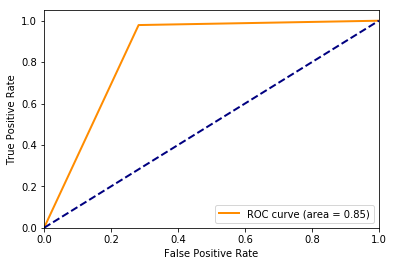

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Train Area under the curve")
plt.figure()
lw=2
plt.plot(fpr_tr, tpr_tr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_tr, tpr_tr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.show()

Test Area under the curve


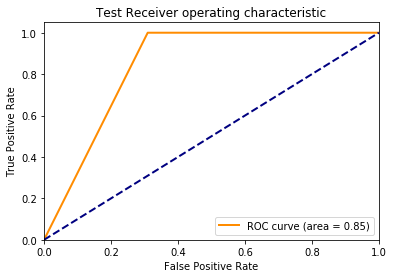

In [32]:
print("Test Area under the curve")
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:


from sklearn.metrics import confusion_matrix
conf = confusion_matrix(test_y, pred_y_test)
print("Confusion Matrix test: ")
print(conf)

conf_tr = confusion_matrix(train_y, pred_y_tr)
print("Confusion Matrix train: ")
print(conf_tr)

In [ ]:
##  Q1 4 , 5 iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clus-
## tering based on kernels. Research what spectral clustering is. Use RBF
## kernel.
## v. One can expect that supervised learning on the full data set works better than
## semi-supervised learning with half of the data set labeled.One can expects
## that unsupervised learning underperforms in such situations. Compare the
## results you obtained by those methods.

In [ ]:
# spectral

In [51]:
import pandas as pd
import random as rand
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import auc
import statistics
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.cluster import SpectralClustering
from sklearn.metrics import recall_score, f1_score ,auc,roc_curve
import numpy as np
ps=[]
rs=[]
acs=[]
fs=[]
AUC=[]

ps_tr=[]
rs_tr=[]
acs_tr=[]
fs_tr=[]
AUC_tr=[]

for m in range(0,30):
    data= pd.read_csv('wdbc.data',header=None)
    data.columns=['IDs','Diagnosis','f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20','f21','f22','f23','f24','f25','f26','f27','f28','f29','f30']
    data_x = data.drop(['IDs','Diagnosis'],axis=1)
    data_x_nomalize = pd.DataFrame(preprocessing.normalize(data_x))
    data = pd.concat([data[['Diagnosis']],data_x_nomalize],axis=1)
    data["Diagnosis"] = data["Diagnosis"].map( {'M':0, 'B':1} )
    data_malignant_filter = data['Diagnosis'] == 0
    data_malignant = data[data_malignant_filter]
    data_malignant_20_test = data_malignant.sample(frac=.20,random_state=rand.randint(0,100))
    data_benign_filter = data['Diagnosis'] == 1
    data_benign = data[data_benign_filter]
    data_benign_20_test= data_benign.sample(frac=.20,random_state=rand.randint(1,100))
    test_data = pd.concat([data_malignant_20_test,data_benign_20_test]) 
    index1 = test_data.index
    train_data = data.drop(index= index1)
    test_x = test_data.drop('Diagnosis',axis=1)
    test_y = test_data['Diagnosis']
    train_x = train_data.drop('Diagnosis',axis=1)
    train_y = train_data['Diagnosis']
    sc=SpectralClustering(n_clusters=2,affinity='rbf',n_init=5,random_state=rand.randint(0,100)).fit(train_x)
    speclabels = pd.DataFrame(sc.labels_)
    label0= speclabels[speclabels[0]==0].index 
    label1=speclabels[speclabels[0]==1].index
    cluster0=train_x.iloc[label0,:]
    cluster1=train_x.iloc[label1,:]
    center0=cluster0.mean(axis=0)
    center1=cluster1.mean(axis=0)
    centers = pd.DataFrame()
    centers[0] = center0
    centers[1] = center1
    neigh = NearestNeighbors(n_neighbors=30,algorithm='brute').fit(train_x)
    distances, indices = neigh.kneighbors(centers.T)
    clus0= train_y.loc[indices[0]]
    poll0=clus0.value_counts()  
    clus1=train_y.loc[indices[1]]
    poll1=clus1.value_counts()
    pred_y = sc.labels_
    pred_y=pd.DataFrame(pred_y)
    pred_y0=pred_y[pred_y[0]==0]
    pred_y1=pred_y[pred_y[0]==1]
    max_index_0=np.argmax(poll0)
    max_index_1=np.argmax(poll1)
    pred_y0['class']=max_index_0
    pred_y1['class']=max_index_1
    pred_y_tr=pd.concat([pred_y0['class'],pred_y1['class']],axis=0)
    pred_y_tr=pred_y_tr.sort_index()
    #print(class0.value_counts())
    #class1=train_y.loc[indices[1]]
    #print(class1.value_counts())  
    #train
    pred_y = sc.labels_
    pred_y=pd.DataFrame(pred_y)
    pred_y0=pred_y[pred_y[0]==0]
    pred_y1=pred_y[pred_y[0]==1]
    max_index_0=np.argmax(poll0)
    max_index_1=np.argmax(poll1)
    pred_y0['class']=max_index_0
    pred_y1['class']=max_index_1
    pred_y_tr=pd.concat([pred_y0['class'],pred_y1['class']],axis=0)
    pred_y_tr=pred_y_tr.sort_index()
    ps_tr.append(precision_score(train_y, pred_y_tr))
    rs_tr.append(recall_score(train_y, pred_y_tr))
    acs_tr.append(accuracy_score(train_y, pred_y_tr)) 
    fs_tr.append(f1_score(train_y, pred_y_tr))
    fpr_tr, tpr_tr, _ = roc_curve(train_y,pred_y_tr)
    AUC_tr.append(auc(fpr_tr, tpr_tr))
    #test
    pred_y_test = sc.fit_predict(test_x)
    ps.append(precision_score(test_y, pred_y_test))
    rs.append(recall_score(test_y, pred_y_test))
    acs.append(accuracy_score(test_y, pred_y_test)) 
    fs.append(f1_score(test_y, pred_y_test))
    fpr, tpr, _ = roc_curve(test_y,pred_y_test)
    AUC.append(auc(fpr, tpr))


In [52]:

print("Train Values")
print("avg  precision score: ",statistics.mean(ps_tr))
print("avg  f1 score: ",statistics.mean(fs_tr))
print("avg  recall score: ",statistics.mean(rs_tr))
print("avg AUC score: ",statistics.mean(AUC_tr))
print("avg acuracy score: ",statistics.mean(acs_tr))
print("TEST values")
print("avg precision score: ",statistics.mean(ps))
print("avg f1 score: ",statistics.mean(fs))
print("avg recall score: ",statistics.mean(rs))
print("avg AUC score: ",statistics.mean(AUC))
print("avg acuracy score: ",statistics.mean(acs))

Train Values
avg  precision score:  0.5869568063551421
avg  f1 score:  0.6454033456366358
avg  recall score:  0.7273892773892774
avg AUC score:  0.6261456190867956
avg acuracy score:  0.6519005847953216
TEST values
avg precision score:  0.3476325170255673
avg f1 score:  0.357024949460168
avg recall score:  0.3751173708920188
avg AUC score:  0.4125586854460094
avg acuracy score:  0.40294985250737464


Train Area under the curve


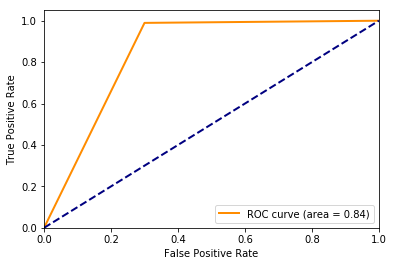

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Train Area under the curve")
plt.figure()
lw=2
plt.plot(fpr_tr, tpr_tr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr_tr, tpr_tr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(loc="lower right")
plt.show()

Test Area under the curve


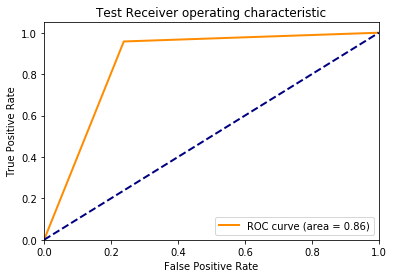

In [54]:
print("Test Area under the curve")
plt.figure()
lw=2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' %auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Test Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [55]:

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(test_y, pred_y_test)
print("Confusion Matrix test: ")
print(conf)

conf_tr = confusion_matrix(train_y, pred_y_tr)
print("Confusion Matrix train: ")
print(conf_tr)

Confusion Matrix test: 
[[32 10]
 [ 3 68]]
Confusion Matrix train: 
[[119  51]
 [  3 283]]
